In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



2023-03-28 21:38:37.760783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load the data
df=pd.read_csv('/Users/yuting/Desktop/IAI5101_Group7-main/Covid_population_vaccine_fillna.csv')
df.tail()

,pruid,prname,date,reporting_year,numtotal_last7,ratecases_total,numdeaths,numdeaths_last7,ratedeaths,ratecases_last7,ratedeaths_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,totalcases,Population,Land_Area_Square_Kilometres,numtotal_atleast1dose,numtotal_partially,numtotal_fully
2320,60,Yukon,2023-01-14,2023,0,11393.27,32,0,73.08,0.00,0.00,0.00,0.00,0.00,4989,43241.0,472345.44,37130.0,1345.0,35785.0
2321,61,Northwest Territories,2023-01-14,2023,0,25240.65,22,0,48.24,0.00,0.00,0.00,0.00,0.00,11511,45710.0,1127711.92,35254.0,1454.0,33800.0
2322,62,Nunavut,2023-01-14,2023,0,8712.93,7,0,17.27,0.00,0.00,0.00,0.00,0.00,3531,40003.0,1836993.78,32797.0,2382.0,30415.0
2323,99,Repatriated travellers,2023-01-14,2023,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,13,0.0,0.00,0.0,0.0,0.0
2324,1,Canada,2023-01-14,2023,13948,11660.01,50135,222,128.78,35.83,0.57,5.12,31.65,0.08,4539229,38516138.0,8788702.80,32432766.0,2660851.0,24367850.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pruid                        2325 non-null   int64  
 1   prname                       2325 non-null   object 
 2   date                         2325 non-null   object 
 3   reporting_year               2325 non-null   int64  
 4   numtotal_last7               2325 non-null   int64  
 5   ratecases_total              2325 non-null   float64
 6   numdeaths                    2325 non-null   int64  
 7   numdeaths_last7              2325 non-null   int64  
 8   ratedeaths                   2325 non-null   float64
 9   ratecases_last7              2325 non-null   float64
 10  ratedeaths_last7             2325 non-null   float64
 11  avgincidence_last7           2325 non-null   float64
 12  avgdeaths_last7              2325 non-null   float64
 13  avgratedeaths_last

## Feature Engineering

In [4]:
# check for missing values
print("Missing values:\n", df.isnull().sum())
# check for deplicate values
print("Duplicates:\n", df.duplicated().sum())

Missing values:
 pruid                          0
prname                         0
date                           0
reporting_year                 0
numtotal_last7                 0
ratecases_total                0
numdeaths                      0
numdeaths_last7                0
ratedeaths                     0
ratecases_last7                0
ratedeaths_last7               0
avgincidence_last7             0
avgdeaths_last7                0
avgratedeaths_last7            0
totalcases                     0
Population                     0
Land_Area_Square_Kilometres    0
numtotal_atleast1dose          0
numtotal_partially             0
numtotal_fully                 0
dtype: int64
Duplicates:
 0


#### Heatmap to check for correlation between predictor variables

<AxesSubplot: >

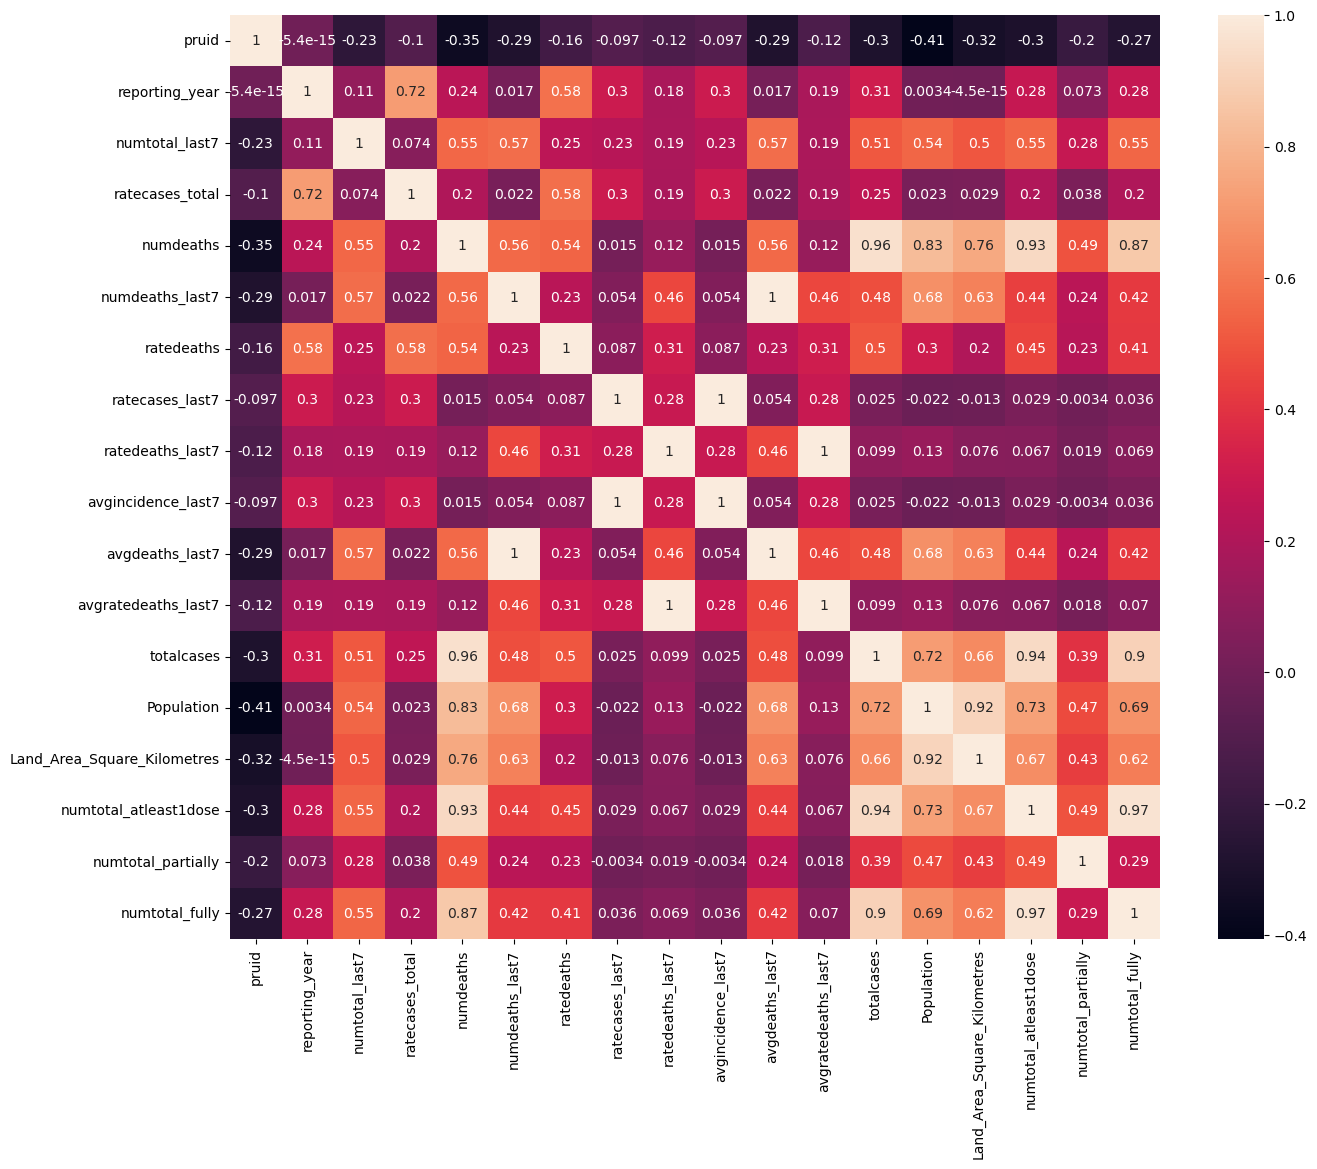

In [5]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot = True)

We can see that the corrlation high socre between number of deaths, total cases, population, number of at least 1 dose, and number of fully vaccination.

### Plot the relationship

/var/folders/s1/4fm2_tw16qzdhqgqcb0ry6rm0000gn/T/ipykernel_70868/4233507550.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/s1/4fm2_tw16qzdhqgqcb0ry6rm0000gn/T/ipykernel_70868/4233507550.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(df['prname'], rotation=90)
/var/folders/s1/4fm2_tw16qzdhqgqcb0ry6rm0000gn/T/ipykernel_70868/4233507550.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(df['prname'], rotation=90)
/var/folders/s1/4fm2_tw16qzdhqgqcb0ry6rm0000gn/T/ipykernel_70868/4233507550.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(df[

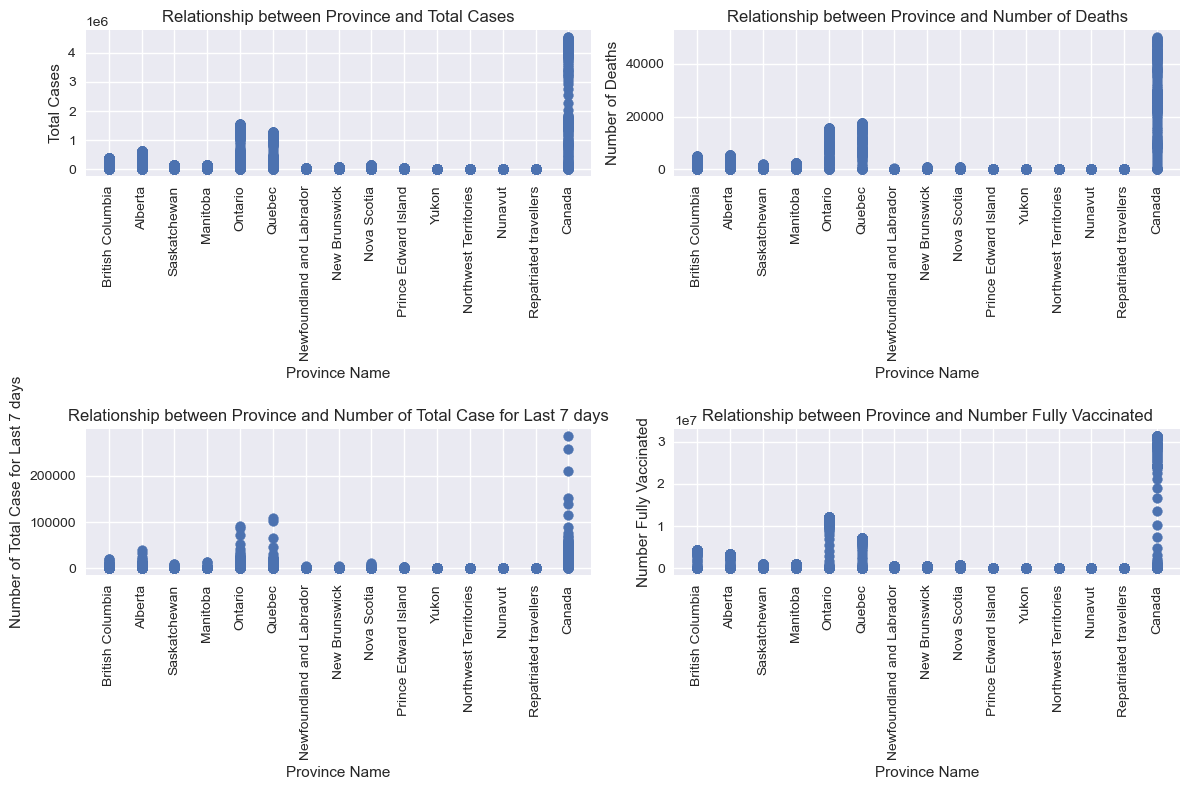

In [6]:
# Set style
plt.style.use('seaborn')

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot totalcases vs prname on the first subplot
axs[0, 0].scatter(df['prname'], df['totalcases'])
axs[0, 0].set_xlabel('Province Name')
axs[0, 0].set_ylabel('Total Cases')
axs[0, 0].set_xticklabels(df['prname'], rotation=90)
axs[0, 0].set_title('Relationship between Province and Total Cases')

# Plot numdeaths vs prname on the second subplot
axs[0, 1].scatter(df['prname'], df['numdeaths'])
axs[0, 1].set_xlabel('Province Name')
axs[0, 1].set_ylabel('Number of Deaths')
axs[0, 1].set_xticklabels(df['prname'], rotation=90)
axs[0, 1].set_title('Relationship between Province and Number of Deaths')

# Plot Population vs prname on the third subplot
axs[1, 0].scatter(df['prname'], df['numtotal_last7'])
axs[1, 0].set_xlabel('Province Name')
axs[1, 0].set_ylabel('Number of Total Case for Last 7 days')
axs[1, 0].set_xticklabels(df['prname'], rotation=90)
axs[1, 0].set_title('Relationship between Province and Number of Total Case for Last 7 days')

# Plot numtotal_fully vs prname on the fourth subplot
axs[1, 1].scatter(df['prname'], df['numtotal_fully'])
axs[1, 1].set_xlabel('Province Name')
axs[1, 1].set_ylabel('Number Fully Vaccinated')
axs[1, 1].set_xticklabels(df['prname'], rotation=90)
axs[1, 1].set_title('Relationship between Province and Number Fully Vaccinated')

# Adjust the layout of the subplots and show the plot
plt.tight_layout()
plt.show()

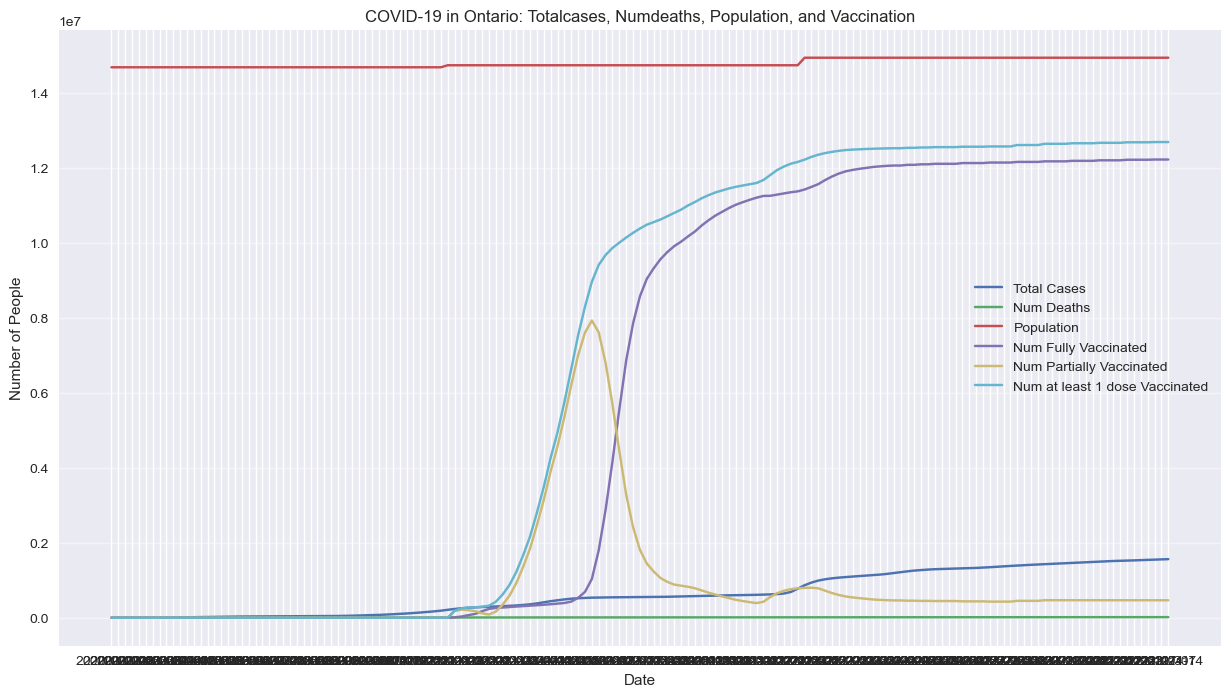

In [7]:
# Plot the Ontario
plt.figure(figsize=(15,8))

plt.plot(df[df['prname'] == 'Ontario']['date'], df[df['prname'] == 'Ontario']['totalcases'], label='Total Cases')
plt.plot(df[df['prname'] == 'Ontario']['date'], df[df['prname'] == 'Ontario']['numdeaths'], label='Num Deaths')
plt.plot(df[df['prname'] == 'Ontario']['date'], df[df['prname'] == 'Ontario']['Population'], label='Population')
plt.plot(df[df['prname'] == 'Ontario']['date'], df[df['prname'] == 'Ontario']['numtotal_fully'], label='Num Fully Vaccinated')
plt.plot(df[df['prname'] == 'Ontario']['date'], df[df['prname'] == 'Ontario']['numtotal_partially'], label='Num Partially Vaccinated')
plt.plot(df[df['prname'] == 'Ontario']['date'], df[df['prname'] == 'Ontario']['numtotal_atleast1dose'], label='Num at least 1 dose Vaccinated')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('COVID-19 in Ontario: Totalcases, Numdeaths, Population, and Vaccination')

# Set legend
plt.legend(frameon=False)

# Add gridlines
plt.grid(axis='y', alpha=0.5)

# Remove spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()


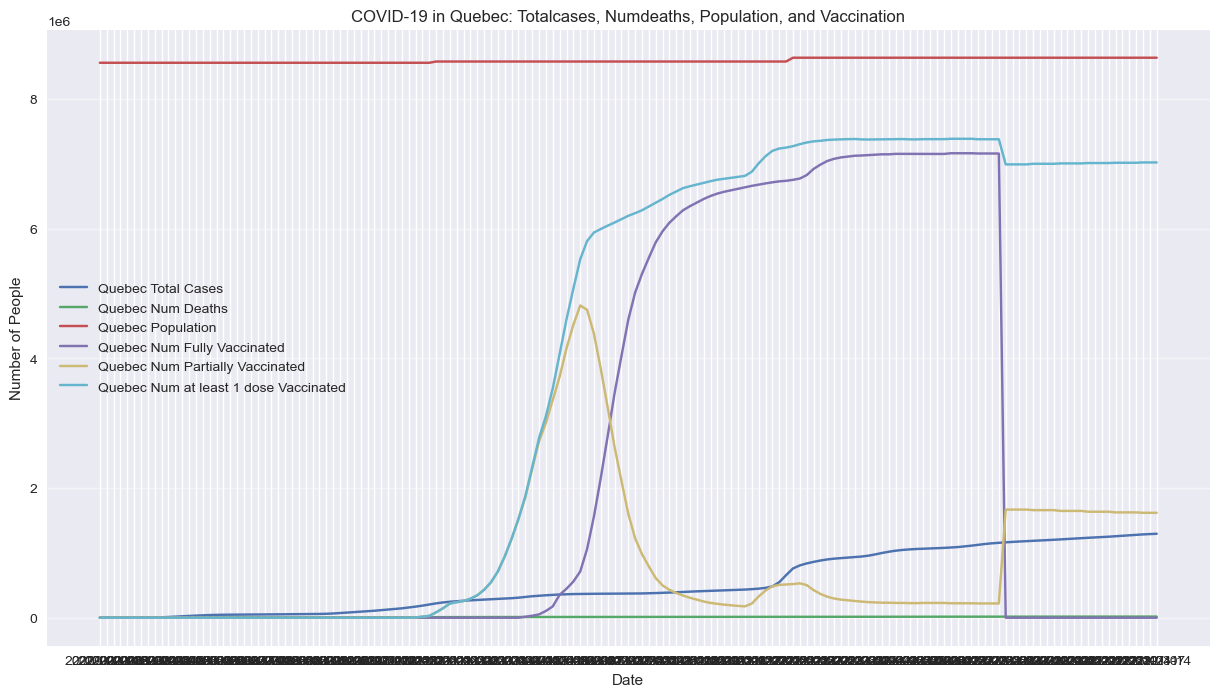

In [8]:
# plot the Quebec
plt.figure(figsize=(15,8))

plt.plot(df[df['prname'] == 'Quebec']['date'], df[df['prname'] == 'Quebec']['totalcases'], label='Quebec Total Cases')
plt.plot(df[df['prname'] == 'Quebec']['date'], df[df['prname'] == 'Quebec']['numdeaths'], label='Quebec Num Deaths')
plt.plot(df[df['prname'] == 'Quebec']['date'], df[df['prname'] == 'Quebec']['Population'], label='Quebec Population')
plt.plot(df[df['prname'] == 'Quebec']['date'], df[df['prname'] == 'Quebec']['numtotal_fully'], label='Quebec Num Fully Vaccinated')
plt.plot(df[df['prname'] == 'Quebec']['date'], df[df['prname'] == 'Quebec']['numtotal_partially'], label='Quebec Num Partially Vaccinated')
plt.plot(df[df['prname'] == 'Quebec']['date'], df[df['prname'] == 'Quebec']['numtotal_atleast1dose'], label='Quebec Num at least 1 dose Vaccinated')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('COVID-19 in Quebec: Totalcases, Numdeaths, Population, and Vaccination')

# Set legend
plt.legend(frameon=False)

# Add gridlines
plt.grid(axis='y', alpha=0.5)

# Remove spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

## Ontario Cases

#### Split dataset into train (70%) and test (30%) and build predictive models to determine the Ontario number of totalcase using the following techniques: Regression, Decision Tree, K-Nearest Neighbor Regressor, Random Forest, XGBoost, DNN, and LSTM.

In [9]:
# select only Ontario data
df = df[df['prname'] == 'Ontario']

# sort the data by date
df = df.sort_values(by='date')

# convert date to numerical value
df['date'] = pd.to_datetime(df['date']).astype(int)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['date']], df['totalcases'], test_size=0.3, shuffle=False)

In [10]:
# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the mean absolute error of the predictions
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - Root Mean Squared Error: {rmse}")
print(f"Linear Regression - Mean Absolute Error: {mae}")
print(f"Linear Regression - R2 Score: {r2}")

Linear Regression - Mean Squared Error: 115963297538.07925
Linear Regression - Root Mean Squared Error: 340533.8419864893
Linear Regression - Mean Absolute Error: 339804.5246257416
Linear Regression - R2 Score: -5.5374797171073435


In [11]:
# create a decision tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# train the model on the training set
dt_model.fit(X_train, y_train)

# make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# calculate the mean absolute error of the predictions
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - Root Mean Squared Error: {rmse_dt}")
print(f"Decision Tree - Mean Absolute Error: {mae_dt}")
print(f"Decision Tree - R2 Score: {r2_dt}")

Decision Tree - Mean Squared Error: 98463066104.2766
Decision Tree - Root Mean Squared Error: 313788.25042419386
Decision Tree - Mean Absolute Error: 284121.170212766
Decision Tree - R2 Score: -4.550896802753767


In [12]:
# create a random forest regression model
rf_model = RandomForestRegressor(random_state=100)

# train the model on the training set
rf_model.fit(X_train, y_train)

# make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# calculate the mean absolute error of the predictions
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")


Random Forest - Mean Squared Error: 105070545503.93484
Random Forest - Root Mean Squared Error: 324145.8707186239
Random Forest - Mean Absolute Error: 295520.420212766
Random Forest - R2 Score: -4.923396235535815


In [13]:
# create a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# train the model on the training set
knn_model.fit(X_train, y_train)

# make predictions on the test set
y_pred_knn = model.predict(X_test)

# calculate the mean absolute error of the predictions
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - Mean Squared Error: {mae_knn}")
print(f"KNN - Root Mean Squared Error: {mae_knn}")
print(f"KNN - Mean Absolute Error: {mae_knn}")
print(f"KNN - R2 Score: {mae_knn}")

KNN - Mean Squared Error: 339804.5246257416
KNN - Root Mean Squared Error: 339804.5246257416
KNN - Mean Absolute Error: 339804.5246257416
KNN - R2 Score: 339804.5246257416


In [14]:
# create an XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# train the model on the training set
xgboost_model.fit(X_train, y_train)

# make predictions on the test set
y_pred_xgboost = model.predict(X_test)

# calculate the mean absolute error of the predictions
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = mean_squared_error(y_test, y_pred_xgboost, squared=False)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f"XGBoost - Mean Squared Error: {mse_xgboost}")
print(f"XGBoost - Root Mean Squared Error: {rmse_xgboost}")
print(f"XGBoost - Mean Absolute Error: {mae_xgboost}")
print(f"XGBoost - R2 Score: {r2_xgboost}")

XGBoost - Mean Squared Error: 115963297538.07925
XGBoost - Root Mean Squared Error: 340533.8419864893
XGBoost - Mean Absolute Error: 339804.5246257416
XGBoost - R2 Score: -5.5374797171073435


In [15]:
# # create an SVM model
# SVM_model = SVR(kernel='linear')

# # train the model on the training set
# SVM_model.fit(X_train, y_train)

# # make predictions on the test set
# y_pred_SVM = model.predict(X_test)

# # calculate the mean absolute error of the predictions
# mae_SVM = mean_absolute_error(y_test, y_pred)
# print(f"SVM - Mean Absolute Error: {mae_SVM}")

In [16]:

# create a DNN model
DNN_model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=[1]),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1)
])

# compile the model
DNN_model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam())

# train the model on the training set
DNN_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# make predictions on the test set
y_pred_DNN = model.predict(X_test)

# calculate the mean absolute error of the predictionsmse_DNN = mean_squared_error(y_test, y_pred)
mse_DNN = mean_squared_error(y_test, y_pred_DNN)
rmse_DNN = mean_squared_error(y_test, y_pred_DNN, squared=False)
mae_DNN = mean_absolute_error(y_test, y_pred_DNN)
r2_DNN = r2_score(y_test, y_pred_DNN)

print(f"DNN - Mean Squared Error: {mse_DNN}")
print(f"DNN - Root Mean Squared Error: {rmse_DNN}")
print(f"DNN - Mean Absolute Error: {mae_DNN}")
print(f"DNN - R2 Score: {r2_DNN}")

2023-03-28 21:38:43.129021: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


DNN - Mean Squared Error: 115963297538.07925
DNN - Root Mean Squared Error: 340533.8419864893
DNN - Mean Absolute Error: 339804.5246257416
DNN - R2 Score: -5.5374797171073435


In [17]:
# reshape the data for LSTM model
X_train_LSTM = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_LSTM = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# create an LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, input_shape=(1, 1)))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mse', optimizer='adam')

# train the model on the training set
LSTM_model.fit(X_train_LSTM, y_train, epochs=100, batch_size=10, verbose=0)

# make predictions on the test set
y_pred_LSTM = LSTM_model.predict(X_test_LSTM)

# calculate the mean absolute error of the predictions
mse_LSTM = mean_squared_error(y_test, y_pred_LSTM)
rmse_LSTM = mean_squared_error(y_test, y_pred_LSTM, squared=False)
mae_LSTM = mean_absolute_error(y_test, y_pred_LSTM)
r2_LSTM = r2_score(y_test, y_pred_LSTM)

print(f"LSTM - Mean Squared Error: {mse_LSTM}")
print(f"LSTM - Root Mean Squared Error: {rmse_LSTM}")
print(f"LSTM - Mean Absolute Error: {mae_LSTM}")
print(f"LSTM - R2 Score: {r2_LSTM}")

2/2 [==============================] - 0s 2ms/step
LSTM - Mean Squared Error: 1893630848417.1672
LSTM - Root Mean Squared Error: 1376092.6016868078
LSTM - Mean Absolute Error: 1369632.2943315709
LSTM - R2 Score: -105.75423626299417


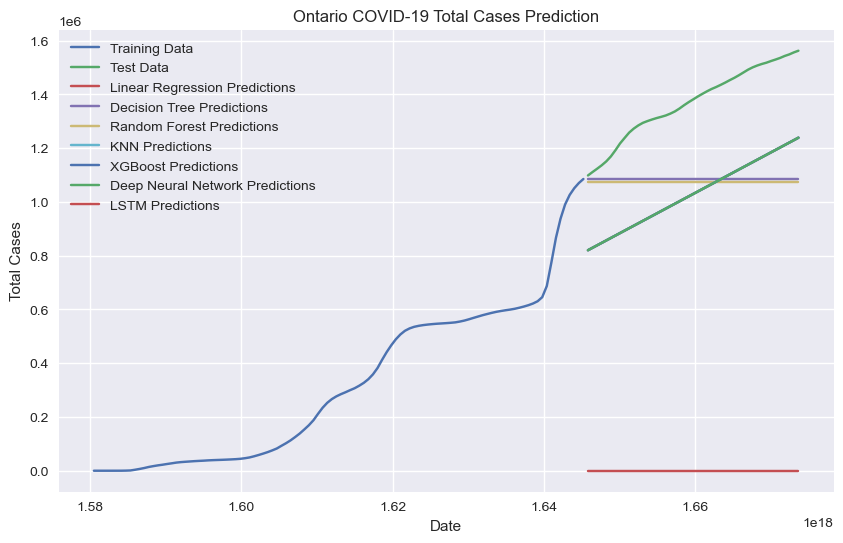

In [18]:
# plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Training Data')
plt.plot(X_test, y_test, label='Test Data')
plt.plot(X_test, y_pred, label='Linear Regression Predictions')
plt.plot(X_test, y_pred_dt, label='Decision Tree Predictions')
plt.plot(X_test, y_pred_rf, label='Random Forest Predictions')
plt.plot(X_test, y_pred_knn, label='KNN Predictions')
plt.plot(X_test, y_pred_xgboost, label='XGBoost Predictions')
plt.plot(X_test, y_pred_DNN, label='Deep Neural Network Predictions')
plt.plot(X_test, y_pred_LSTM, label='LSTM Predictions')

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Ontario COVID-19 Total Cases Prediction')
plt.legend()
plt.show()


In [19]:
# create a dictionary to store the metrics for each model
metrics = {'Linear Regression': {'RMSE': None, 'MAE': None, 'MSE': None, 'R2': None},
           'Decision Tree': {'RMSE': None, 'MAE': None, 'MSE': None, 'R2': None},
           'Random Forest': {'RMSE': None, 'MAE': None, 'MSE': None, 'R2': None},
           'KNN': {'RMSE': None, 'MAE': None, 'MSE': None, 'R2': None},
           'XGBoost': {'RMSE': None, 'MAE': None, 'MSE': None, 'R2': None},
           'Deep Neural Network': {'RMSE': None, 'MAE': None, 'MSE': None, 'R2': None},
           'LSTM': {'RMSE': None, 'MAE': None, 'MSE': None, 'R2': None}}

# calculate the metrics for each model
models = [model, dt_model, rf_model, knn_model, xgboost_model, DNN_model, LSTM_model]
y_preds = [y_pred, y_pred_dt, y_pred_rf, y_pred_knn, y_pred_xgboost, y_pred_DNN, y_pred_LSTM]

for i, model in enumerate(models):
    y_pred = y_preds[i]
    model_name = list(metrics.keys())[i]
    metrics[model_name]['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
    metrics[model_name]['MAE'] = mean_absolute_error(y_test, y_pred)
    metrics[model_name]['MSE'] = mean_squared_error(y_test, y_pred)
    metrics[model_name]['R2'] = r2_score(y_test, y_pred)

# print the metrics for each model
for model_name, model_metrics in metrics.items():
    print(f"{model_name}:")
    for metric_name, metric_value in model_metrics.items():
        print(f"{metric_name}: {metric_value}")
    print("---------------------------")
    

Linear Regression:
RMSE: 340533.8419864893
MAE: 339804.5246257416
MSE: 115963297538.07925
R2: -5.5374797171073435
---------------------------
Decision Tree:
RMSE: 313788.25042419386
MAE: 284121.170212766
MSE: 98463066104.2766
R2: -4.550896802753767
---------------------------
Random Forest:
RMSE: 324145.8707186239
MAE: 295520.420212766
MSE: 105070545503.93484
R2: -4.923396235535815
---------------------------
KNN:
RMSE: 340533.8419864893
MAE: 339804.5246257416
MSE: 115963297538.07925
R2: -5.5374797171073435
---------------------------
XGBoost:
RMSE: 340533.8419864893
MAE: 339804.5246257416
MSE: 115963297538.07925
R2: -5.5374797171073435
---------------------------
Deep Neural Network:
RMSE: 340533.8419864893
MAE: 339804.5246257416
MSE: 115963297538.07925
R2: -5.5374797171073435
---------------------------
LSTM:
RMSE: 1376092.6016868078
MAE: 1369632.2943315709
MSE: 1893630848417.1672
R2: -105.75423626299417
---------------------------


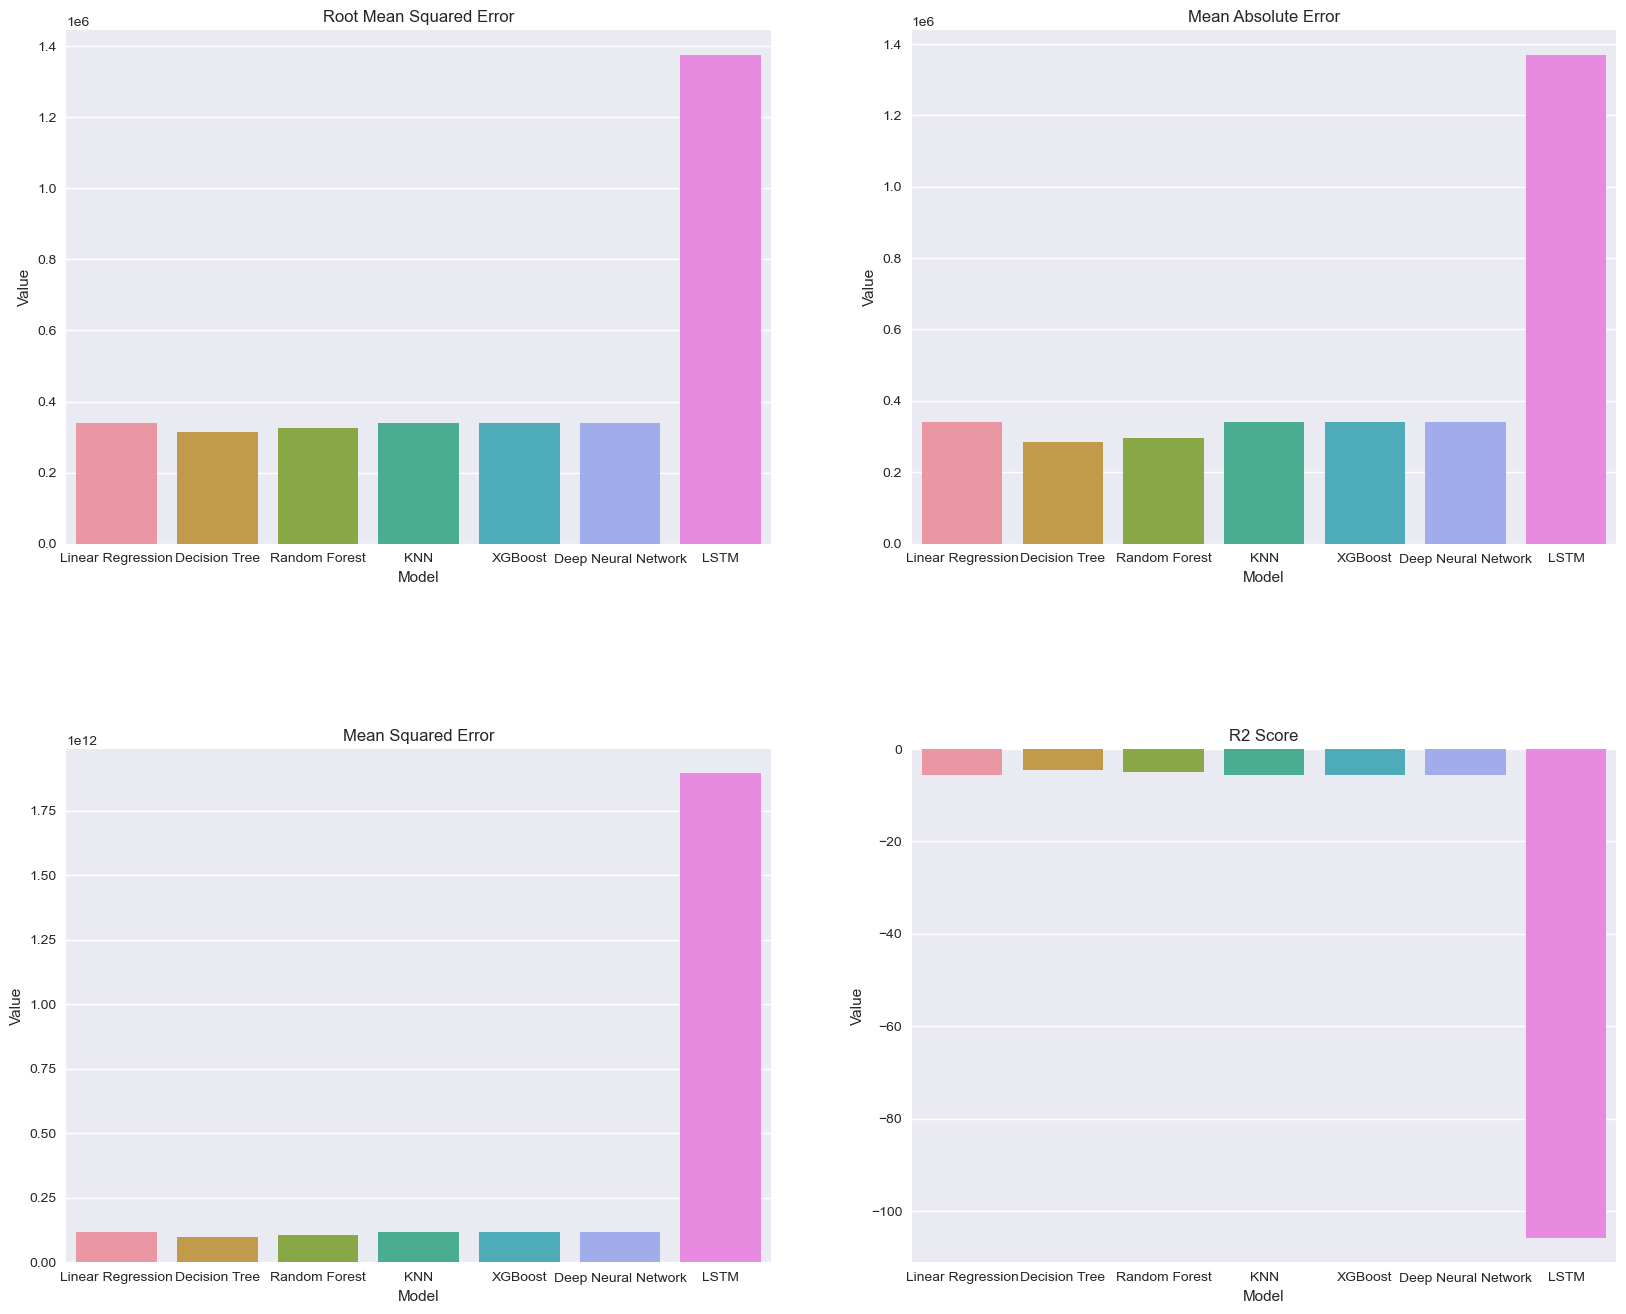

In [20]:
# create lists to store the metric values for each model
model_names = list(metrics.keys())
rmse_values = [metrics[model]['RMSE'] for model in model_names]
mae_values = [metrics[model]['MAE'] for model in model_names]
mse_values = [metrics[model]['MSE'] for model in model_names]
r2_values = [metrics[model]['R2'] for model in model_names]

# create a figure with subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

# plot the RMSE metric
sns.barplot(x=model_names, y=rmse_values, ax=axes[0, 0])
axes[0, 0].set_title("Root Mean Squared Error")
axes[0, 0].set_ylabel("Value")
axes[0, 0].set_xlabel("Model")

# plot the MAE metric
sns.barplot(x=model_names, y=mae_values, ax=axes[0, 1])
axes[0, 1].set_title("Mean Absolute Error")
axes[0, 1].set_ylabel("Value")
axes[0, 1].set_xlabel("Model")

# plot the MSE metric
sns.barplot(x=model_names, y=mse_values, ax=axes[1, 0])
axes[1, 0].set_title("Mean Squared Error")
axes[1, 0].set_ylabel("Value")
axes[1, 0].set_xlabel("Model")

# plot the R2 metric
sns.barplot(x=model_names, y=r2_values, ax=axes[1, 1])
axes[1, 1].set_title("R2 Score")
axes[1, 1].set_ylabel("Value")
axes[1, 1].set_xlabel("Model")

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# display the plot
plt.show()


As you can see from the chart, the results of each model are not very good. We may need to re-divide the data, or adjust the parameters.

### add variable for datasets

In [27]:
# load data
df=pd.read_csv('/Users/yuting/Desktop/IAI5101_Group7-main/Covid_population_vaccine_fillna.csv')

# select only Ontario data
df = df[df['prname'] == 'Ontario']

# convert date to numerical value
df['date'] = pd.to_datetime(df['date']).astype(int)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['date', 'numdeaths', 'Population', 'numtotal_atleast1dose', 'numtotal_fully']], 
                                                    df['totalcases'], test_size=0.3, shuffle=False)

# train linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

# train decision tree model
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

# train KNN model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# train random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# train XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# train deep neural network model
dnn = Sequential()
dnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dnn.add(Dense(64, activation='relu'))
dnn.add(Dense(1))
dnn.compile(optimizer='adam', loss='mse')
dnn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
dnn_pred = dnn.predict(X_test)

# train LSTM model
lstm = Sequential()
lstm.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1])), y_train, epochs=50, batch_size=32, verbose=0)
lstm_pred = lstm.predict(X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1])))



2/2 [==============================] - 0s 2ms/step


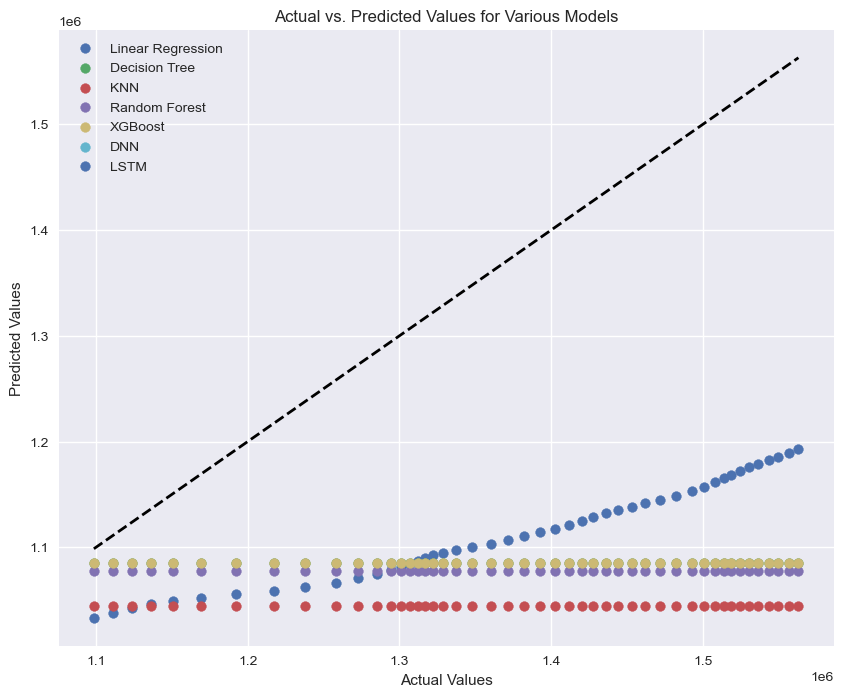

In [44]:
# plot the actual and predicted values for each model
plt.figure(figsize=(10, 8))
plt.scatter(y_test, linreg_pred, label='Linear Regression')
plt.scatter(y_test, dtree_pred, label='Decision Tree')
plt.scatter(y_test, knn_pred, label='KNN')
plt.scatter(y_test, rf_pred, label='Random Forest')
plt.scatter(y_test, xgb_pred, label='XGBoost')
plt.scatter(y_test, dnn_pred, label='DNN')
plt.scatter(y_test, lstm_pred.flatten(), label='LSTM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Various Models')
plt.legend()
plt.show()


In [46]:
# calculate evaluation metrics
metrics = {
    'Linear Regression': [r2_score(y_test, linreg_pred), mean_squared_error(y_test, linreg_pred), mean_absolute_error(y_test, linreg_pred)],
    'Decision Tree': [r2_score(y_test, dtree_pred), mean_squared_error(y_test, dtree_pred), mean_absolute_error(y_test, dtree_pred)],
    'KNN': [r2_score(y_test, knn_pred), mean_squared_error(y_test, knn_pred), mean_absolute_error(y_test, knn_pred)],
    'Random Forest': [r2_score(y_test, rf_pred), mean_squared_error(y_test, rf_pred), mean_absolute_error(y_test, rf_pred)],
    'XGBoost': [r2_score(y_test, xgb_pred), mean_squared_error(y_test, xgb_pred), mean_absolute_error(y_test, xgb_pred)],
    'DNN': [r2_score(y_test, dnn_pred), mean_squared_error(y_test, dnn_pred), mean_absolute_error(y_test, dnn_pred)],
    'LSTM': [r2_score(y_test, lstm_pred.flatten()), mean_squared_error(y_test, lstm_pred.flatten()), mean_absolute_error(y_test, lstm_pred.flatten())]
}

# plot bar chart of evaluation metrics
fig, ax = plt.subplots(figsize=(12,6))
models = metrics.keys()
r2_scores = [metrics[m][0] for m in models]
mse_scores = [metrics[m][1] for m in models]
mae_scores = [metrics[m][2] for m in models]
rmse_scores = [mse**(0.5) for mse in mse_scores]
x = np.arange(len(models))

ax.bar(x - 0.3, r2_scores, width=0.2, label='R2 Score')
ax.bar(x - 0.1, mse_scores, width=0.2, label='MSE')
ax.bar(x + 0.1, mae_scores, width=0.2, label='MAE')
ax.bar(x + 0.3, rmse_scores, width=0.2, label='RMSE')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for all Models')
ax.legend()

plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').